<a href="https://colab.research.google.com/github/JiviteshJamuda/PROJECT-C-113/blob/master/data_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import files
data_to_load = files.upload()

import statistics 
import plotly.express as px
import pandas as pd

df = pd.read_csv("data.csv")

graph = px.scatter(df, x="female", y="quant_saved")
graph.show()

Saving data.csv to data (2).csv


In [26]:
import csv
import plotly.graph_objects as go

with open("data.csv", newline="") as f:
  reader = csv.reader(f) 
  savings_data = list(reader)

savings_data.pop(0)
total_entries = len(savings_data)

female = 0

for data in savings_data:
  if(int(data[1]) == 1):
    female += 1

graph = go.Figure(go.Bar(x=["female","male"], y=[female, (total_entries-female)]))
graph.show()

In [28]:
all_savings = []

for data in savings_data:
  all_savings.append(float(data[0]))

print("mean : " + str(statistics.mean(all_savings)))
print("median : " + str(statistics.median(all_savings)))
print("mode : " + str(statistics.mode(all_savings)))

mean : 85.32780331328739
median : 39.2724
mode : 0.0


In [31]:
female_savings = []
male_savings = []

for data in savings_data:
  if(int(data[1]) == 1):
    female_savings.append(float(data[0]))
  else:
    male_savings.append(float(data[0]))

print("result for savings of females - ")
print("mean   : " + str(statistics.mean(female_savings)))
print("median : " + str(statistics.median(female_savings)))
print("mode   : " + str(statistics.mode(female_savings)))

print("\n\n")

print("result for savings of males - ")
print("mean   : " + str(statistics.mean(male_savings)))
print("median : " + str(statistics.median(male_savings)))
print("mode   : " + str(statistics.mode(male_savings)))

result for savings of females - 
mean   : 80.0998678893177
median : 39.2724
mode   : 0.0



result for savings of males - 
mean   : 94.48225870875959
median : 39.2724
mode   : 0.0


In [32]:
print("standard deviation of all data           : " + str(statistics.stdev(all_savings)))
print("standard deviation for savings of female : " + str(statistics.stdev(female_savings)))
print("standard deviation for savings of male   : " + str(statistics.stdev(male_savings)))

standard deviation of all data           : 196.75453011909315
standard deviation for savings of female : 183.70373742366775
standard deviation for savings of male   : 217.44838443764846


In [8]:
import numpy as np
is_wealthy = []
savings = []

for data in savings_data:
  is_wealthy.append(float(data[3]))
  savings.append(float(data[0]))

correlation = np.corrcoef(savings, is_wealthy)
print(correlation)

[[ 1.         -0.01816356]
 [-0.01816356  1.        ]]


In [10]:
import plotly.figure_factory as ff

graph = ff.create_distplot([df["quant_saved"].tolist()], ["savings"], show_hist = False)
graph.show()

q1 :  2.2840000000000003
q3 :  86.514
Interquartile range : 84.22999999999999
lower_point :  -124.06099999999998
higher_point :  212.85899999999998


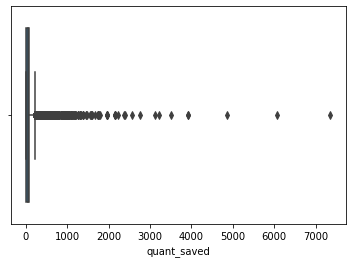

In [12]:
import seaborn as sb

sb.boxplot(data=df, x=df["quant_saved"])

q1 = df["quant_saved"].quantile(.25)
q3 = df["quant_saved"].quantile(.75)
print("q1 : ", q1)
print("q3 : ", q3)

iqr = q3 - q1
print("Interquartile range :",iqr)

lower_point = q1 - 1.5 * iqr
higher_point = q3 + 1.5 * iqr
print("lower_point : ", lower_point)
print("higher_point : ", higher_point)

new_df = df[df["quant_saved"] < higher_point]


In [13]:
import statistics

all_savings = new_df["quant_saved"].tolist()
print("mean :", statistics.mean(all_savings))
print("median :", statistics.median(all_savings))
print("mode :", statistics.mode(all_savings))
print("standard deviation :", statistics.stdev(all_savings))

graph = ff.create_distplot([new_df["quant_saved"].tolist()], ["savings"], show_hist=False)
graph.show()

mean : 46.200519389818794
median : 36.0475
mode : 0.0
standard deviation : 50.866871917288634


In [15]:
import random
import plotly.graph_objects as go

sampling_mean_list = []

for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(all_savings))
  
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

graph = ff.create_distplot([sampling_mean_list], ["savings"], show_hist=False)
graph.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0,0.1], mode="lines", name="mean"))
graph.show()

print("sampling data standard deviation :", statistics.stdev(sampling_mean_list))
print("population mean                  :", statistics.stdev(all_savings))
print("mean of sampling data            :", statistics.mean(sampling_mean_list))

sampling data standard deviation : 5.131408185721106
population mean : 50.866871917288634
mean of sampling data : 46.37069250419617


In [34]:
import numpy as np

temp_df = new_df
is_wealthy = temp_df["wealthy"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(savings, is_wealthy)
print("correlation -\n", correlation)

correlation -
 [[1.         0.02403073]
 [0.02403073 1.        ]]


In [37]:
female_df = new_df.loc[new_df["female"] == 1]
male_df = new_df.loc[new_df["female"] == 0]

print(female_df.head())
print("\n")
print(male_df.head())

graph = ff.create_distplot([male_df["quant_saved"].tolist()], ["male savings"], show_hist = False)
graph.show()


   quant_saved  female  highschool_completed  wealthy
0      13.0908       1                     0        0
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1


    quant_saved  female  highschool_completed  wealthy
1     39.272400       0                     1        1
8      2.284000       0                     1        1
10    58.908600       0                     1        1
17     2.284000       0                     1        1
28    47.178078       0                     0        0


In [38]:
male_savings = male_df["quant_saved"].tolist()
sampling_mean_list_male = []

for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(male_savings))
  
  sampling_mean_list_male.append(statistics.mean(temp_list))

print("mean of sampling of male :", statistics.mean(sampling_mean_list_male))
mean_sampling_male = statistics.mean(sampling_mean_list_male)
stdev_sampling_male = statistics.stdev(sampling_mean_list_male)
print("standard deviation of sampling of male :", statistics.stdev(sampling_mean_list_male))

graph = ff.create_distplot([sampling_mean_list_male], ["savings"], show_hist=False)
graph.add_trace(go.Scatter(x=[mean_sampling,mean_sampling], y=[0,0.1], mode="lines"))
graph.show()

mean of sampling of male : 47.14367887167399
standard deviation of sampling of male : 5.307442694891555


In [ ]:
first_standard_deviation_start = mean_sampling_male - stdev_sampling_male
first_standard_deviation_end = mean_sampling_male + stdev_sampling_male

second_standard_deviation_start = mean_sampling_male - (2*stdev_sampling_male)
second_standard_deviation_end = mean_sampling_male + (2*stdev_sampling_male)

third_standard_deviation_start = mean_sampling_male - (3*stdev_sampling_male)
third_standard_deviation_end = mean_sampling_male + (3*stdev_sampling_male)

In [39]:
female_savings = female_df["quant_saved"].tolist()
sampling_mean_list_female= []

for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(female_savings))
  
  sampling_mean_list_female.append(statistics.mean(temp_list))

print("mean of sampling of female :", statistics.mean(sampling_mean_list_female))
mean_sampling_female = statistics.mean(sampling_mean_list_female)
stdev_sampling_female = statistics.stdev(sampling_mean_list_female)
print("standard deviation of sampling of female :", statistics.stdev(sampling_mean_list_female))

graph = ff.create_distplot([sampling_mean_list_female], ["savings"], show_hist=False)
graph.add_trace(go.Scatter(x=[mean_sampling,mean_sampling], y=[0,0.1], mode="lines"))
graph.show()

mean of sampling of female : 45.54594852220267
standard deviation of sampling of female : 4.895376662135267


In [40]:
z_score = (mean_sampling_female - mean_sampling_male)/stdev_sampling_male
print("z-score :",z_score)

z-score : -0.3010358173078618
